In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from feature_selection import FeatureSelector
from outlier_detection import OutlierDetector

df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

fs = FeatureSelector(X_train, y_train, task_type='classification')
fs.run_selection()

Running permutation feature selection...
Running symmetrical_uncertainty feature selection...
Running f_score feature selection...
Running jmim feature selection...
Running LASSO feature selection...
Running sequential feature selection...


c:\Users\GIRAFFE\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


Running random_forest feature selection...


In [2]:
results_table = fs.get_results_table()
print(results_table)

              permutation symmetrical_uncertainty f_score jmim LASSO  \
Location                ✗                       ✗       ✗    ✓     ✓   
MinTemp                 ✓                       ✓       ✓    ✓     ✓   
MaxTemp                 ✓                       ✓       ✓    ✓     ✗   
Rainfall                ✓                       ✓       ✓    ✓     ✓   
WindGustDir             ✓                       ✗       ✗    ✓     ✓   
WindGustSpeed           ✓                       ✓       ✓    ✓     ✓   
WindDir9am              ✓                       ✗       ✗    ✓     ✓   
WindDir3pm              ✗                       ✗       ✓    ✓     ✓   
WindSpeed9am            ✗                       ✓       ✓    ✗     ✓   
WindSpeed3pm            ✗                       ✗       ✓    ✓     ✓   
Pressure9am             ✗                       ✓       ✓    ✓     ✓   
Pressure3pm             ✓                       ✗       ✓    ✓     ✓   
Temp9am                 ✗                       ✗       ✗    ✗  

In [3]:
count_table = fs.get_count()
print("Feature selection counts:")
print(count_table)

Feature selection counts:
               Count
MinTemp        7 / 7
Temp3pm        7 / 7
MaxTemp        6 / 7
Rainfall       6 / 7
WindGustSpeed  6 / 7
WindSpeed9am   5 / 7
Pressure9am    5 / 7
Pressure3pm    5 / 7
RainToday      5 / 7
WindDir9am     4 / 7
WindDir3pm     4 / 7
WindSpeed3pm   4 / 7
Location       3 / 7
WindGustDir    3 / 7
Temp9am        2 / 7


In [4]:
selected_by_3 = fs.selected_by_at_most(3)
print("\nFeatures selected by at most 3 methods:", selected_by_3)


Features selected by at most 3 methods: ['Location', 'WindGustDir', 'Temp9am']


In [5]:
# We select features that are chosen by more than half the methods (ie. count with 4 and above)

X_train_important_features = X_train.drop(columns=['WindGustDir', 'Temp9am']).reset_index(drop=True)
X_test_important_features = X_test.drop(columns=['WindGustDir', 'Temp9am']).reset_index(drop=True)


In [8]:
print(X_train_important_features)

           Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed WindDir9am  \
0            Albury      9.9     17.4      15.8           35.0          W   
1     BadgerysCreek     14.7     28.9       0.0           46.0        NaN   
2     BadgerysCreek     18.1     29.6       0.0           26.0        NNW   
3            Albury      1.1     16.6       0.0           28.0        NaN   
4            Albury      6.9     29.6       0.0           31.0        SSE   
...             ...      ...      ...       ...            ...        ...   
8016   CoffsHarbour      9.2     18.2       0.0           48.0         SW   
8017  BadgerysCreek     18.6     20.8       0.2           37.0          S   
8018  BadgerysCreek      1.3     20.3       0.0           31.0        NaN   
8019   CoffsHarbour     19.8     31.7       0.0           50.0        NNW   
8020         Albury      8.4     13.9       0.2           31.0        ESE   

     WindDir3pm  WindSpeed9am  WindSpeed3pm  Pressure9am  Pressure3pm  \
0 

In [9]:
from outlier_detection import OutlierDetector

# Removal of outliers from the X train set
od = OutlierDetector(X_train_important_features, y_train)
outliers = od.run_selection()

In [10]:
results_table = od.get_results_table()
print(results_table)

     HBOS KNN LOF SOD IForest OCSVM ABOD
0       ✗   ✗   ✗   ✗       ✗     ✗    ✓
1       ✗   ✗   ✗   ✗       ✗     ✗    ✗
2       ✗   ✗   ✗   ✗       ✗     ✗    ✗
3       ✗   ✗   ✗   ✗       ✗     ✗    ✗
4       ✗   ✗   ✗   ✗       ✗     ✗    ✗
...   ...  ..  ..  ..     ...   ...  ...
8016    ✗   ✗   ✗   ✗       ✗     ✗    ✗
8017    ✗   ✗   ✗   ✗       ✗     ✗    ✗
8018    ✗   ✗   ✗   ✗       ✗     ✗    ✗
8019    ✗   ✗   ✗   ✗       ✗     ✗    ✗
8020    ✗   ✗   ✗   ✗       ✗     ✗    ✗

[8021 rows x 7 columns]


In [11]:
all_selected = od.all_detection_selected()
print("Outliers selected by all methods:", all_selected)


Outliers selected by all methods: [2108, 5248]


In [12]:
selected_by_four = od.selected_by_at_least(4)
print("Outliers selected by at least 4 methods:", selected_by_four)


Outliers selected by at least 4 methods: [5, 32, 39, 48, 65, 67, 76, 103, 112, 124, 125, 127, 137, 158, 171, 188, 194, 207, 216, 229, 243, 245, 249, 267, 273, 290, 344, 368, 375, 376, 393, 401, 403, 434, 457, 459, 468, 502, 525, 529, 537, 554, 581, 629, 653, 695, 703, 705, 739, 781, 797, 806, 830, 831, 854, 855, 927, 933, 939, 941, 943, 964, 980, 1001, 1019, 1022, 1047, 1055, 1058, 1059, 1061, 1082, 1087, 1088, 1156, 1168, 1189, 1195, 1203, 1220, 1226, 1236, 1248, 1251, 1253, 1268, 1276, 1291, 1310, 1317, 1336, 1344, 1384, 1404, 1417, 1419, 1465, 1482, 1489, 1536, 1578, 1584, 1601, 1606, 1616, 1622, 1628, 1638, 1643, 1672, 1673, 1683, 1689, 1694, 1703, 1724, 1727, 1806, 1812, 1871, 1883, 1954, 1990, 1995, 2011, 2024, 2030, 2032, 2060, 2065, 2071, 2074, 2092, 2098, 2108, 2130, 2163, 2188, 2201, 2210, 2255, 2262, 2263, 2268, 2274, 2290, 2307, 2310, 2343, 2350, 2362, 2374, 2383, 2385, 2404, 2414, 2428, 2435, 2461, 2492, 2496, 2498, 2521, 2538, 2548, 2564, 2569, 2574, 2605, 2616, 2621, 264

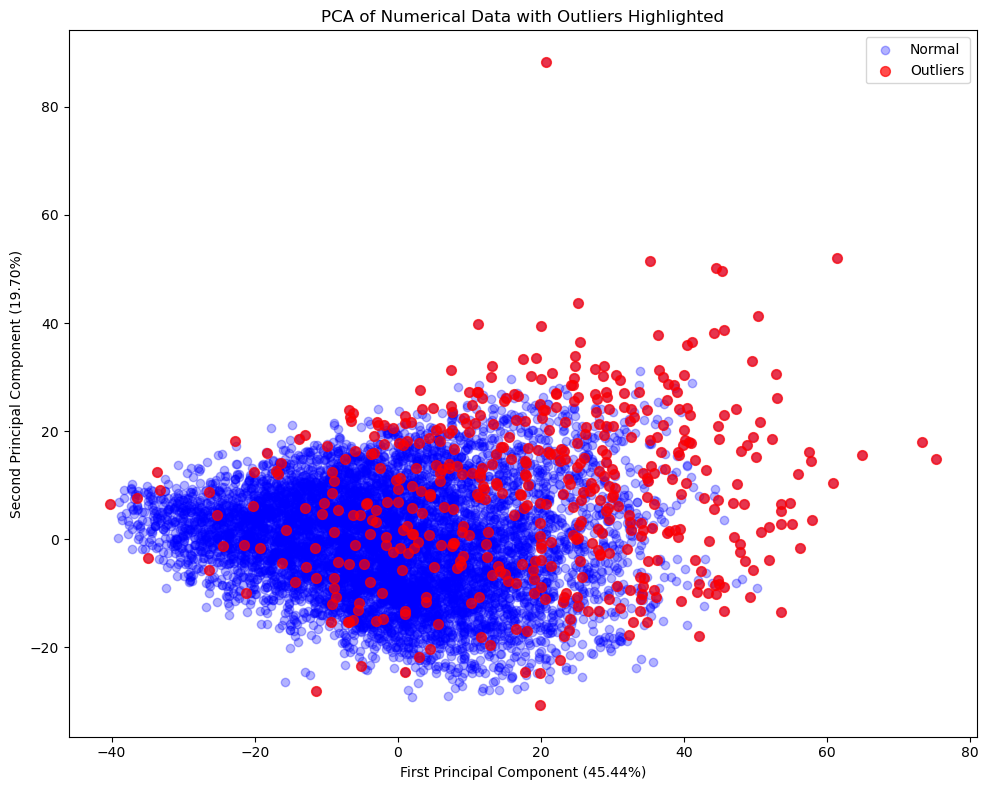

In [13]:
plot = od.pcaplot(selected_by_four)

# Only 65% of variance is explained by these 2 principal components. 

In [14]:
print(X_train_important_features)

           Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed WindDir9am  \
0            Albury      9.9     17.4      15.8           35.0          W   
1     BadgerysCreek     14.7     28.9       0.0           46.0        NaN   
2     BadgerysCreek     18.1     29.6       0.0           26.0        NNW   
3            Albury      1.1     16.6       0.0           28.0        NaN   
4            Albury      6.9     29.6       0.0           31.0        SSE   
...             ...      ...      ...       ...            ...        ...   
8016   CoffsHarbour      9.2     18.2       0.0           48.0         SW   
8017  BadgerysCreek     18.6     20.8       0.2           37.0          S   
8018  BadgerysCreek      1.3     20.3       0.0           31.0        NaN   
8019   CoffsHarbour     19.8     31.7       0.0           50.0        NNW   
8020         Albury      8.4     13.9       0.2           31.0        ESE   

     WindDir3pm  WindSpeed9am  WindSpeed3pm  Pressure9am  Pressure3pm  \
0 

In [15]:
X_train_dropped = X_train_important_features.drop(selected_by_four).reset_index(drop=True)

y_train = y_train.reset_index(drop=True)

y_train_dropped = y_train.drop(selected_by_four).reset_index(drop=True)


In [16]:
print(X_train_dropped)
print(y_train_dropped)

           Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed WindDir9am  \
0            Albury      9.9     17.4      15.8           35.0          W   
1     BadgerysCreek     14.7     28.9       0.0           46.0        NaN   
2     BadgerysCreek     18.1     29.6       0.0           26.0        NNW   
3            Albury      1.1     16.6       0.0           28.0        NaN   
4            Albury      6.9     29.6       0.0           31.0        SSE   
...             ...      ...      ...       ...            ...        ...   
7530   CoffsHarbour      9.2     18.2       0.0           48.0         SW   
7531  BadgerysCreek     18.6     20.8       0.2           37.0          S   
7532  BadgerysCreek      1.3     20.3       0.0           31.0        NaN   
7533   CoffsHarbour     19.8     31.7       0.0           50.0        NNW   
7534         Albury      8.4     13.9       0.2           31.0        ESE   

     WindDir3pm  WindSpeed9am  WindSpeed3pm  Pressure9am  Pressure3pm  \
0 

In [33]:
print(y_train_dropped.unique())

['No' 'Yes' nan]


In [17]:
from pipelinesV3 import GLMPipeline, NBPipeline
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

pipeline = NBPipeline(task_type='classification')
pipeline.fit(X_train_dropped, y_train_dropped)



Fitting step: remove_missing_y
Before remove_missing_y: X shape = (7535, 13), y type = <class 'pandas.core.series.Series'>
After remove_missing_y: X shape = (7455, 13), y type = <class 'pandas.core.series.Series'>
y unique values: ['No' 'Yes']
Fitting step: save_missing_y_mask
Before save_missing_y_mask: X shape = (7455, 13), y type = <class 'pandas.core.series.Series'>
After save_missing_y_mask: X shape = (7455, 13), y type = <class 'pandas.core.series.Series'>
y unique values: ['No' 'Yes']
Fitting step: save_encoded_y
Before save_encoded_y: X shape = (7455, 13), y type = <class 'pandas.core.series.Series'>
After save_encoded_y: X shape = (7455, 13), y type = <class 'pandas.core.series.Series'>
y unique values: [0 1]
Fitting step: converter
Before converter: X shape = (7455, 13), y type = <class 'pandas.core.series.Series'>
Fitting + Transforming, returning X            Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed WindDir9am  \
0            Albury      9.9     17.4      15.8   

NBPipeline(steps=[('remove_missing_y', RemoveMissingYValues()),
                  ('save_missing_y_mask', SaveMissingYMask()),
                  ('save_encoded_y', SaveEncodedY()),
                  ('converter', ColumnTypeConverter()),
                  ('mice_imputer', MICEImputer()),
                  ('preprocessor',
                   CustomColumnTransformer(transformers=[('num',
                                                          Pipeline(steps=[('scaler',
                                                                           StandardScaler())]),
                                                          <function NBPipeline.__init__.<locals>.<lambda> at 0x000001F3E16425F0>),
                                                         ('cat',
                                                          Pipeline(steps=[('ordinal',
                                                                           OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                          unknown_value=-1))]),
                                                          <function NBPipeline.__init__.<locals>.<lambda> at 0x000001F3E1641630>)])),
                  ('save_preprocessed_x', SavePreprocessedX()),
                  ('to_array', DataFrameToArrayTransformer()),
                  ('classifier', GaussianNB())])

In [18]:
y_pred = pipeline.predict(X_test_important_features)

Before remove_missing_y: X shape = (2006, 13), X type = <class 'pandas.core.frame.DataFrame'>
X dtypes: Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Pressure9am      float64
Pressure3pm      float64
Temp3pm          float64
RainToday         object
dtype: object
After remove_missing_y: X shape = (2006, 13), X type = <class 'pandas.core.frame.DataFrame'>
X dtypes: Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Pressure9am      float64
Pressure3pm      float64
Temp3pm          float64
RainToday         object
dtype: object
Before save_missing_y_mask: X shape = (2006, 13), X type = <class 'pandas.core.frame.DataFrame'>
X dtypes: Location

In [21]:
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.7911


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB

df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.4153


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8445


c:\Users\GIRAFFE\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
